In [1]:
#| default_exp explore_data

# Explore data

In [2]:
#|hide
from nbdev.showdoc import *

In [28]:
#|hide
#|export
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import seaborn as sns

from ML_projects import const_vals as CONST


In [39]:
#|export


class DataExploration():


  def __init__(self,
               path_to_data : str , #path to read the data the will be analyzied 
               cols_for_analysis: list , # list with columns to be analysed
               gt_col : str , #name of the ground truth column 
               ):
    

    self.cols_for_analysis = cols_for_analysis
    self.gt_col = gt_col

    # read the dataframe 
    try:
      self.df = pd.read_csv(path_to_data)

    except Exception as e:
      error_str = CONST.ERROR_READ_DF + str(e)
      print(error_str)

    
    for col in self.cols_for_analysis:

      self._generate_histogram_(col_name = col)
      self._scatter_plots_gt_(col_name = col)





  def _generate_histogram_(self,
                           col_name : str , # column name to be useed for analysis
                           ):
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(self.df[col_name], bins=CONST.BINS_HIST, 
             color=CONST.COLOSR_HIST, 
             alpha=CONST.ALPHA_HIST)
    
   
    plt.title(CONST.TITLE_HIST + col_name)
    plt.xlabel(col_name)
    plt.ylabel(CONST.Y_LABEL_HIST)
    plt.grid(CONST.TO_GRID)


    # Calculate skewness and kurtosis
    skewness = self.df[col_name].skew()
    kurtosis = self.df[col_name].kurtosis()

    # create a list with two empty handles (or more if needed)
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                    lw=0, alpha=0)] * 2

    labels = []
    labels.append("skewness = {0:.4g}".format(skewness))
    labels.append("kurtosis = {0:.4g}".format(kurtosis))


    plt.legend(handles, labels, loc='best', fontsize='small',fancybox=True,framealpha=0.7, 
          handlelength=0, handletextpad=0)
    plt.grid(True)

  def _scatter_plots_gt_(self,
                         col_name
                         ):

    # Extract the columns for the scatter plot
    x = self.df[self.gt_col]
    y = self.df[col_name]

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='red', alpha=0.5)
    plt.title(f'{self.gt_col} vs {col_name}')
    plt.xlabel(self.gt_col)
    plt.ylabel(col_name)


    # Show plot
    plt.show()





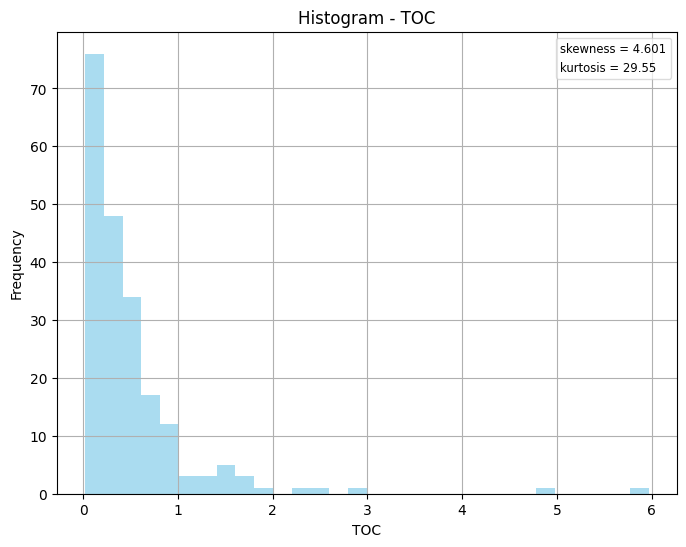

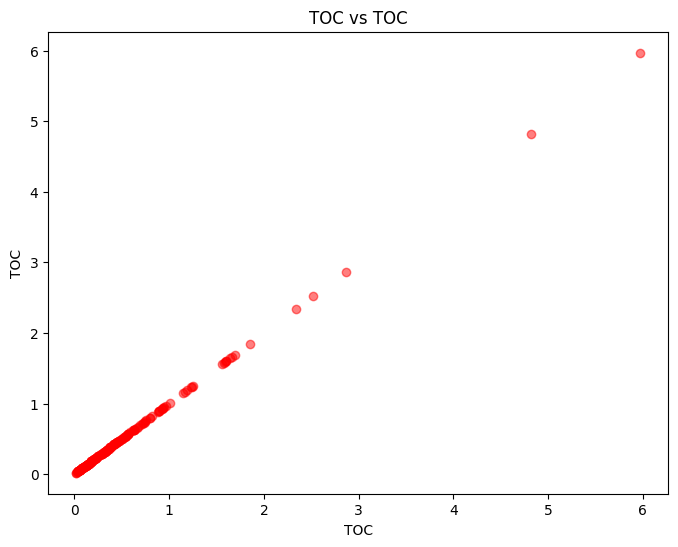

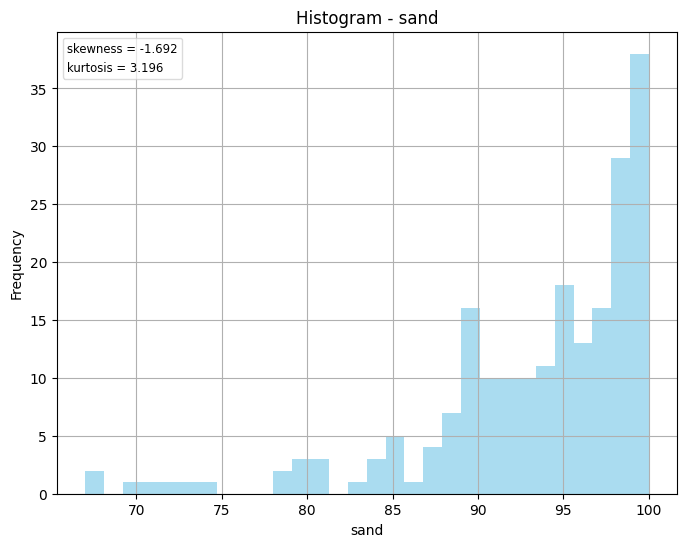

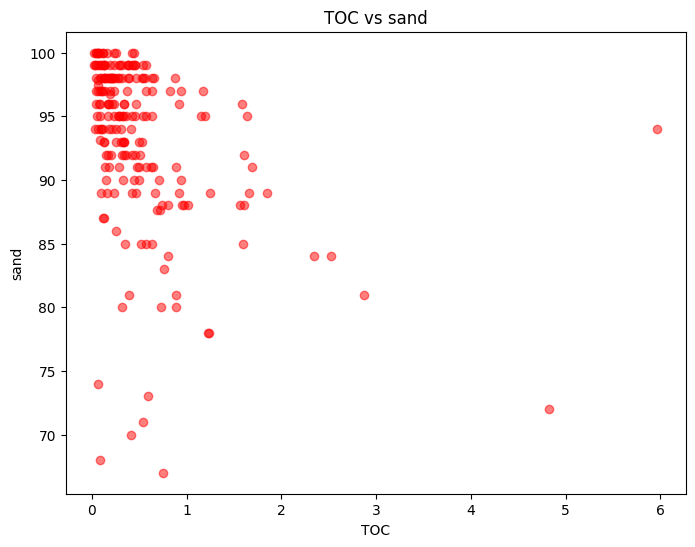

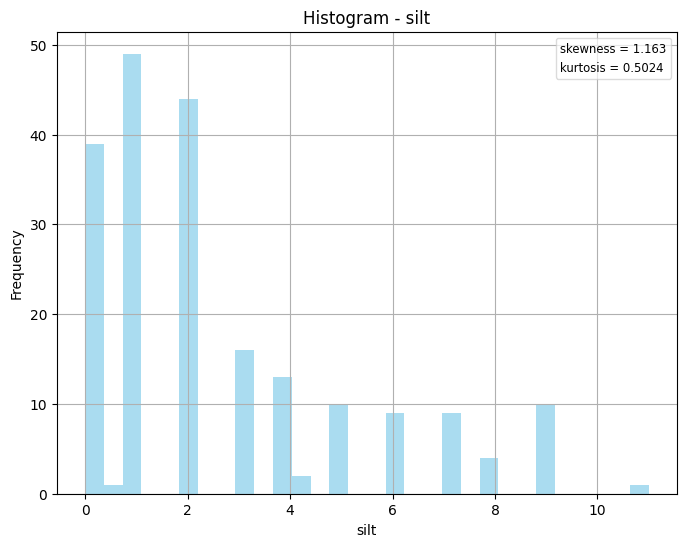

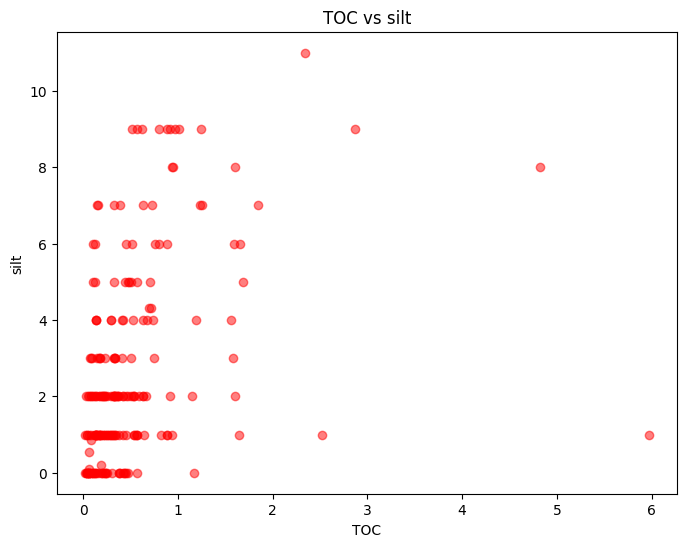

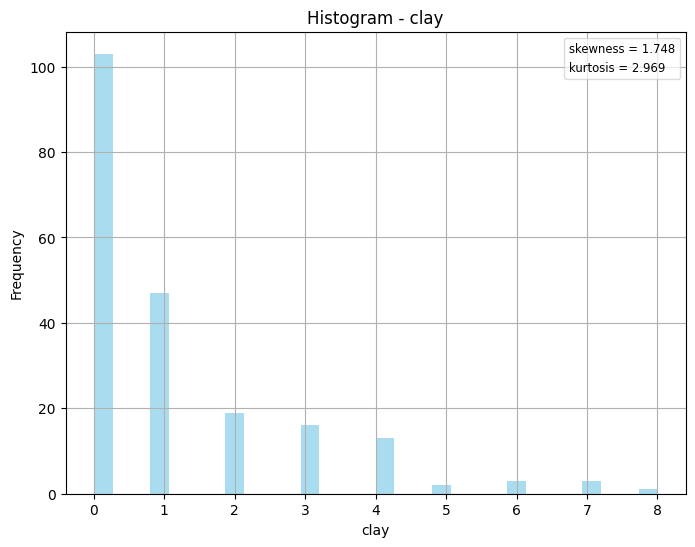

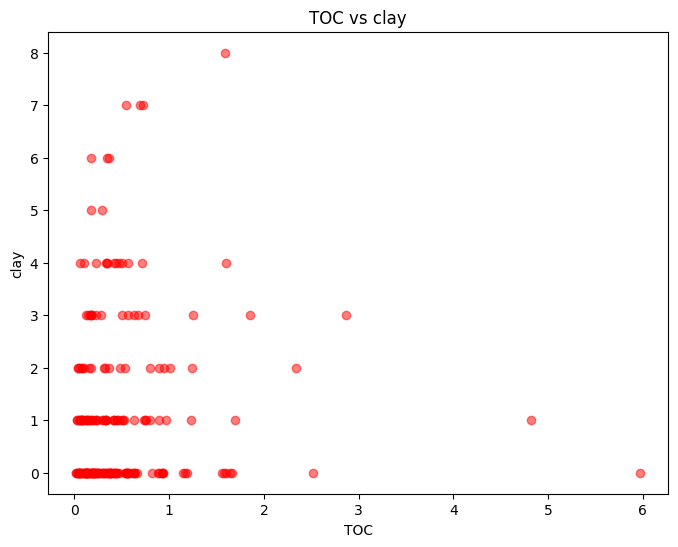

In [44]:
instance = DataExploration(path_to_data= r"D:\git\ML_projects\nbs\data\resampled_sen2_v2.csv",
                           cols_for_analysis = ['TOC' ,'sand','silt','clay'],
                           gt_col= "TOC")


In [13]:
test=instance.df
test1 = test[test['TOC']<3]
test1.to_csv('data/resampled_sen2_v1.csv')

In [43]:

test2 = test[test['silt']<16]
test2.to_csv('data/resampled_sen2_v2.csv')

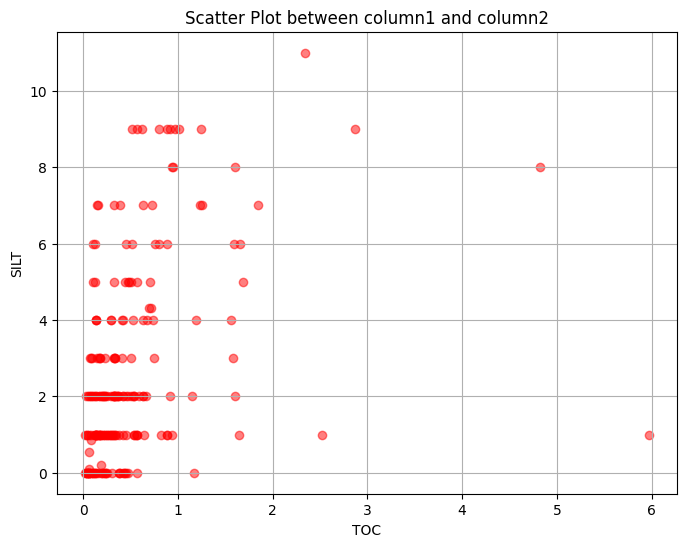

In [42]:
# Extract the columns for the scatter plot
x = test2['TOC']
y = test2['silt']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', alpha=0.5)
plt.title('Scatter Plot between column1 and column2')
plt.xlabel('TOC')
plt.ylabel('SILT')
plt.grid(True)